# Introduction

This notebook is intended to begin analysis on the cleaned data that was output from the "Cleaning" notebook in this repo.

The project question is:
> How do environmental parameters affect the area of N. luetkeana expression on the sea surface in the Salish Sea? Is there variation in their effects as a function of time?

The process by which the data was cleaned, as well as the cleaned data can be found in our github repo:

> https://github.com/EllisWebb/5100_Kelp_vs_Temperature/blob/main/code/Cleaning.ipynb

This notebook will output several graphs which depict the relationship between temperature and kelp expression.


# Import libraries

In [1]:
# Import pandas, numpy, and matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# seaborn is a data visualization library built on matplotlib
import seaborn as sns
# set the plotting style
sns.set_style("whitegrid")

# Model preprocessing
from sklearn.preprocessing import StandardScaler

# Modeling
import statsmodels.formula.api as smf
import statsmodels.api as sm

# Model metrics and analysis
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from statsmodels.stats.anova import anova_lm

## Upload data

# Load  kelp bed information

In [2]:
bed_vars = ['Lummi_SW_corrDF','Aiston_Preserve_corrDF','Cherry_Point_Gulf_Rd_corrDF','Coffin_Rocks_corrDF','Ebeys_Landing_corrDF',
    'Freshwater_Bay_1_corrDF','Freshwater_Bay_2_corrDF','Hat_Island_corrDF', 'Hoypus_Point_corrDF', 'North_Beach_East_corrDF','Polnell_Point_corrDF',
    'Possession_Point_corrDF','Shannon_Point_East_corrDF',
    'Shannon_Point_West_corrDF']

path = "https://raw.githubusercontent.com/EllisWebb/5100_Kelp_vs_Temperature/refs/heads/main/data/cleaned_data/corr_dfs/"

name_map = {
    "Lummi_SW_corrDF": "Lummi_SW",
    "Aiston_Preserve_corrDF": "Aiston_Preserve",
    "Cherry_Point_Gulf_Rd_corrDF": "Cherry_Point_Gulf_Rd",
    "Coffin_Rocks_corrDF": "Coffin_Rocks",
    "Ebeys_Landing_corrDF": "Ebeys_Landing",
    "Freshwater_Bay_1_corrDF": "Freshwater_Bay_1",
    "Freshwater_Bay_2_corrDF": "Freshwater_Bay_2",
    "Hat_Island_corrDF": "Hat_Island",
    "Hoypus_Point_corrDF": "Hoypus_Point",
    "North_Beach_East_corrDF": "north_beach_east_clean",
    "Polnell_Point_corrDF": "polnell_clean",
    "Possession_Point_corrDF": "Possession_Point",
    "Shannon_Point_East_corrDF": "Shannon_Point_East",
    "Shannon_Point_West_corrDF": "Shannon_Point_West",
    "Biz_Point_corrDF": "Biz_Point",
    "Clallam_Bay_corrDF": "Clallam",
    "allbed_corrDF": "all_beds_df"

}

### Define a fucntion to standaridize the names for the beds

In [3]:
def dataimport(bed_vars, path, name_map):
    for var in bed_vars:
        df = pd.read_csv(path + var + ".csv")
        clean_name = name_map[var]
        globals()[clean_name] = df
        print(f"Loaded {var} → variable: {clean_name}")

In [4]:
dataimport(bed_vars, path, name_map)

Loaded Lummi_SW_corrDF → variable: Lummi_SW
Loaded Aiston_Preserve_corrDF → variable: Aiston_Preserve
Loaded Cherry_Point_Gulf_Rd_corrDF → variable: Cherry_Point_Gulf_Rd
Loaded Coffin_Rocks_corrDF → variable: Coffin_Rocks
Loaded Ebeys_Landing_corrDF → variable: Ebeys_Landing
Loaded Freshwater_Bay_1_corrDF → variable: Freshwater_Bay_1
Loaded Freshwater_Bay_2_corrDF → variable: Freshwater_Bay_2
Loaded Hat_Island_corrDF → variable: Hat_Island
Loaded Hoypus_Point_corrDF → variable: Hoypus_Point
Loaded North_Beach_East_corrDF → variable: north_beach_east_clean
Loaded Polnell_Point_corrDF → variable: polnell_clean
Loaded Possession_Point_corrDF → variable: Possession_Point
Loaded Shannon_Point_East_corrDF → variable: Shannon_Point_East
Loaded Shannon_Point_West_corrDF → variable: Shannon_Point_West


In [5]:
ebey_clean = Ebeys_Landing
north_clean = north_beach_east_clean
shannon_east_clean = Shannon_Point_East
shannon_west_clean = Shannon_Point_West

# Linear Regressions

## All bed

In [6]:
all_beds_df = pd.read_csv(path + "allbed_corrDF.csv")

### MLR all beds

In [7]:
model_all_multiple = smf.ols(formula='PctAcreChange ~ + Temp_t + Temp_t_minus1 + Temp_t_minus2 + Temp_t_minus3 + Temp_t_minus4', data=all_beds_df).fit()

In [8]:
print(model_all_multiple.summary())

                            OLS Regression Results                            
Dep. Variable:          PctAcreChange   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     1.524
Date:                Thu, 11 Dec 2025   Prob (F-statistic):              0.188
Time:                        23:23:08   Log-Likelihood:                -635.71
No. Observations:                 117   AIC:                             1283.
Df Residuals:                     111   BIC:                             1300.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -6.6423     50.067     -0.133

### SLR for all beds

In [9]:
model_all_single_acres = smf.ols(formula='Acres ~ Temp_t_minus2', data=all_beds_df).fit()
print(model_all_single_acres.summary())

                            OLS Regression Results                            
Dep. Variable:                  Acres   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                    0.2161
Date:                Thu, 11 Dec 2025   Prob (F-statistic):              0.643
Time:                        23:23:08   Log-Likelihood:                -658.86
No. Observations:                 134   AIC:                             1322.
Df Residuals:                     132   BIC:                             1328.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        13.7886     21.309      0.647

## Line Plots of the Indicated All Beds factors

### Temp t minus 2

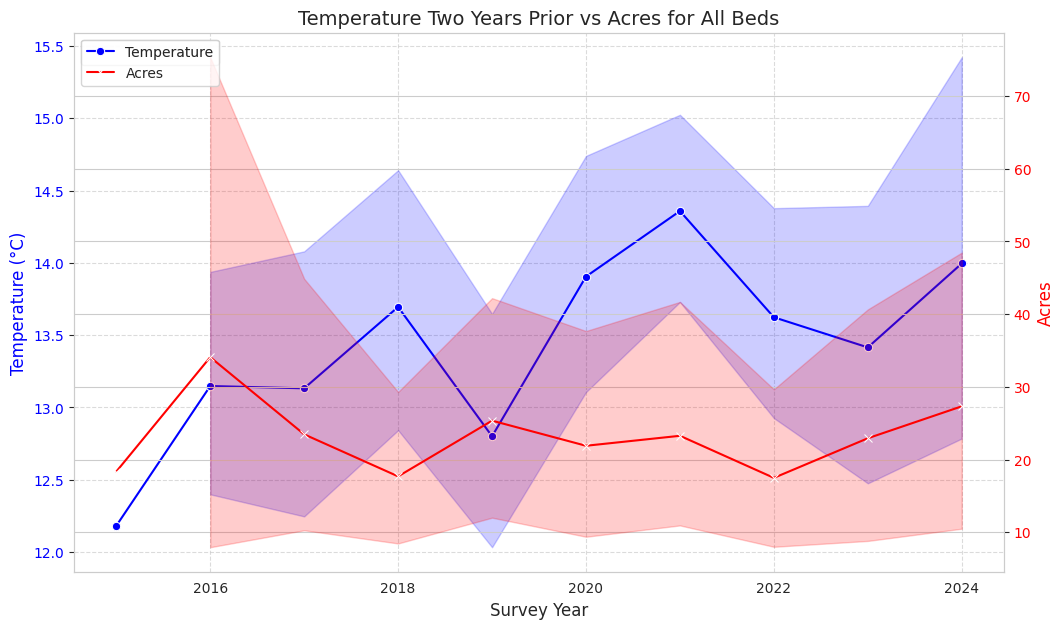

In [10]:
# Create a figure and a set of subplots
fig, ax1 = plt.subplots(figsize=(12, 7))

# Plot Temp_t on the first y-axis
sns.lineplot(data=all_beds_df, x='Survey Year', y='Temp_t_minus2', marker='o', ax=ax1, color='blue', label='Temperature')
ax1.set_xlabel('Survey Year', fontsize=12)
ax1.set_ylabel('Temperature (°C)', color='blue', fontsize=12)
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid(True, linestyle='--', alpha=0.7)

# Create a second y-axis that shares the same x-axis
ax2 = ax1.twinx()

# Plot Acres on the second y-axis
sns.lineplot(data=all_beds_df, x='Survey Year', y='Acres', marker='x', ax=ax2, color='red', label='Acres')
ax2.set_ylabel('Acres', color='red', fontsize=12)
ax2.tick_params(axis='y', labelcolor='red')

# Add a title to the plot
plt.title('Temperature Two Years Prior vs Acres for All Beds', fontsize=14)

# Add legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.show()

### Percent Acre Change for All Beds



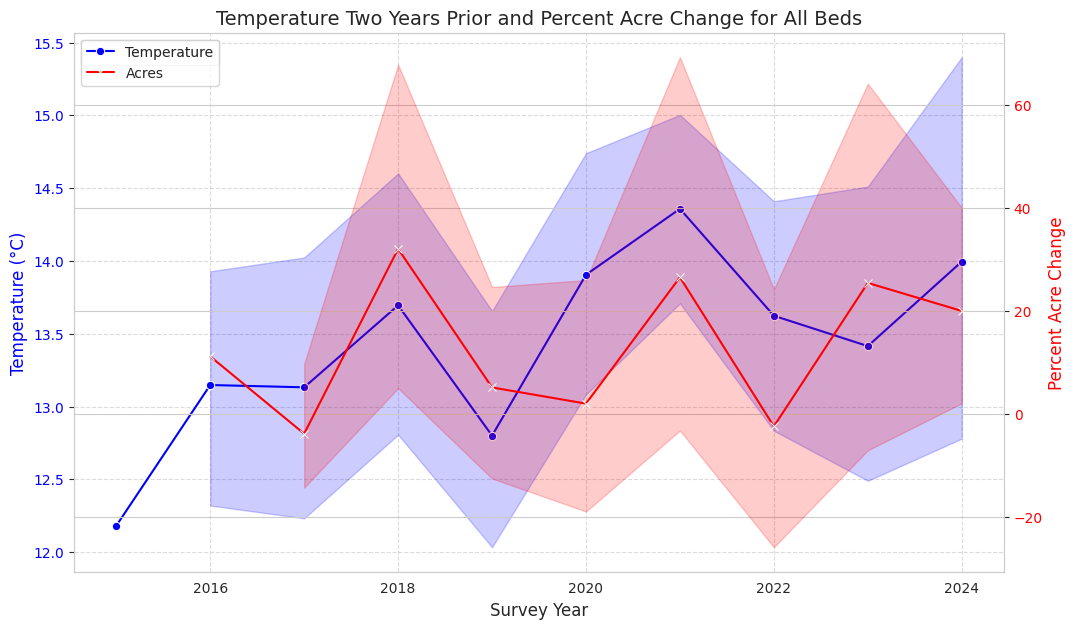

In [11]:
# Create a figure and a set of subplots
fig, ax1 = plt.subplots(figsize=(12, 7))

# Plot Temp_t on the first y-axis
sns.lineplot(data=all_beds_df, x='Survey Year', y='Temp_t_minus2', marker='o', ax=ax1, color='blue', label='Temperature')
ax1.set_xlabel('Survey Year', fontsize=12)
ax1.set_ylabel('Temperature (°C)', color='blue', fontsize=12)
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid(True, linestyle='--', alpha=0.7)

# Create a second y-axis that shares the same x-axis
ax2 = ax1.twinx()

# Plot Percent Acre Change on the second y-axis
sns.lineplot(data=all_beds_df, x='Survey Year', y='PctAcreChange', marker='x', ax=ax2, color='red', label='Acres')
ax2.set_ylabel('Percent Acre Change', color='red', fontsize=12)
ax2.tick_params(axis='y', labelcolor='red')

# Add a title to the plot
plt.title('Temperature Two Years Prior and Percent Acre Change for All Beds', fontsize=14)

# Add legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.show()

## Ebey

### MLR Ebey

In [12]:
model_ebey_multiple_acres = smf.ols(formula='Acres ~ + Temp_t + Temp_offset_minus1 +Temp_offset_minus2 + Temp_offset_minus3 + Temp_offset_minus4', data=ebey_clean).fit()

print(model_ebey_multiple_acres.summary())


                            OLS Regression Results                            
Dep. Variable:                  Acres   R-squared:                       0.185
Model:                            OLS   Adj. R-squared:                 -0.833
Method:                 Least Squares   F-statistic:                    0.1821
Date:                Thu, 11 Dec 2025   Prob (F-statistic):              0.955
Time:                        23:23:14   Log-Likelihood:                -34.926
No. Observations:                  10   AIC:                             81.85
Df Residuals:                       4   BIC:                             83.67
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            301.7626    434

### SLR Ebey

In [13]:
model_ebey_single_acres = smf.ols(formula='Acres ~ Temp_offset_minus2', data=ebey_clean).fit()

print(model_ebey_single_acres.summary())

                            OLS Regression Results                            
Dep. Variable:                  Acres   R-squared:                       0.095
Model:                            OLS   Adj. R-squared:                 -0.018
Method:                 Least Squares   F-statistic:                    0.8398
Date:                Thu, 11 Dec 2025   Prob (F-statistic):              0.386
Time:                        23:23:14   Log-Likelihood:                -35.452
No. Observations:                  10   AIC:                             74.90
Df Residuals:                       8   BIC:                             75.51
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             91.7408     66

### Ebey Plot

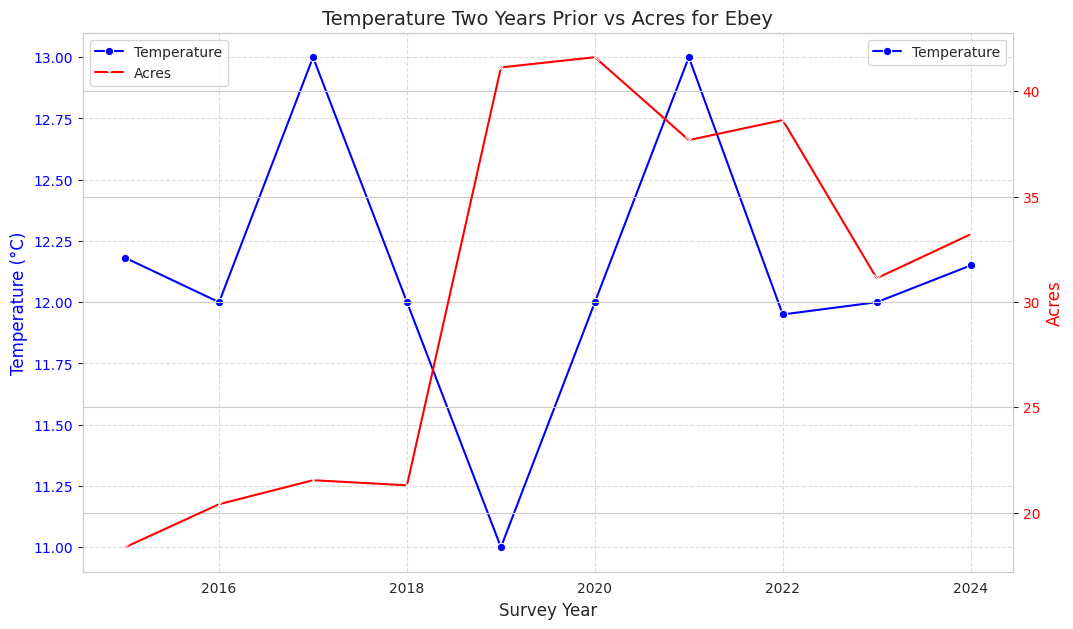

In [14]:
# Create a figure and a set of subplots
fig, ax1 = plt.subplots(figsize=(12, 7))

# Plot Temp_t on the first y-axis
sns.lineplot(data=ebey_clean, x='Survey Year', y='Temp_offset_minus2', marker='o', ax=ax1, color='blue', label='Temperature')
ax1.set_xlabel('Survey Year', fontsize=12)
ax1.set_ylabel('Temperature (°C)', color='blue', fontsize=12)
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid(True, linestyle='--', alpha=0.7)

# Create a second y-axis that shares the same x-axis
ax2 = ax1.twinx()

# Plot Acres on the second y-axis
sns.lineplot(data=ebey_clean, x='Survey Year', y='Acres', marker='x', ax=ax2, color='red', label='Acres')
ax2.set_ylabel('Acres', color='red', fontsize=12)
ax2.tick_params(axis='y', labelcolor='red')

# Add a title to the plot
plt.title('Temperature Two Years Prior vs Acres for Ebey', fontsize=14)

# Add legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.show()

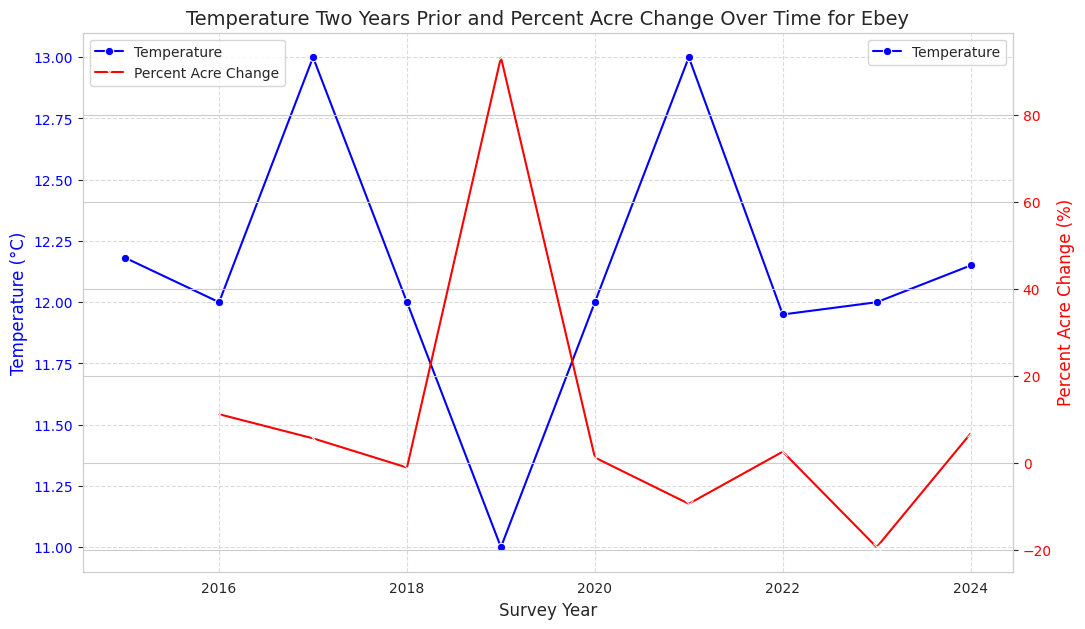

In [15]:
# Create a figure and a set of subplots
fig, ax1 = plt.subplots(figsize=(12, 7))

# Plot Temp_t on the first y-axis
sns.lineplot(data=ebey_clean, x='Survey Year', y='Temp_offset_minus2', marker='o', ax=ax1, color='blue', label='Temperature')
ax1.set_xlabel('Survey Year', fontsize=12)
ax1.set_ylabel('Temperature (°C)', color='blue', fontsize=12)
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid(True, linestyle='--', alpha=0.7)

# Create a second y-axis that shares the same x-axis
ax2 = ax1.twinx()

# Plot PctAcreChange on the second y-axis
sns.lineplot(data=ebey_clean, x='Survey Year', y='PctAcreChange', marker='x', ax=ax2, color='red', label='Percent Acre Change')
ax2.set_ylabel('Percent Acre Change (%)', color='red', fontsize=12)
ax2.tick_params(axis='y', labelcolor='red')

# Add a title to the plot
plt.title('Temperature Two Years Prior and Percent Acre Change Over Time for Ebey', fontsize=14)

# Add legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.show()

## North Beach

In [16]:
model_north_multiple = smf.ols(formula='Acres ~ + Temp_t + Temp_offset_minus1 +Temp_offset_minus2 + Temp_offset_minus3 + Temp_offset_minus4', data=north_clean).fit()

print(model_north_multiple.summary())



                            OLS Regression Results                            
Dep. Variable:                  Acres   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.506
Method:                 Least Squares   F-statistic:                     2.637
Date:                Thu, 11 Dec 2025   Prob (F-statistic):              0.227
Time:                        23:23:15   Log-Likelihood:                -19.124
No. Observations:                   9   AIC:                             50.25
Df Residuals:                       3   BIC:                             51.43
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            -70.9902     39

### SLR North Beach

In [17]:
model_north_single = smf.ols(formula='PctAcreChange ~ Temp_offset_minus1', data=north_clean).fit()

print(model_north_single.summary())


                            OLS Regression Results                            
Dep. Variable:          PctAcreChange   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     13.37
Date:                Thu, 11 Dec 2025   Prob (F-statistic):             0.0106
Time:                        23:23:15   Log-Likelihood:                -35.128
No. Observations:                   8   AIC:                             74.26
Df Residuals:                       6   BIC:                             74.42
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           -399.1161    110

### North Beach Plots

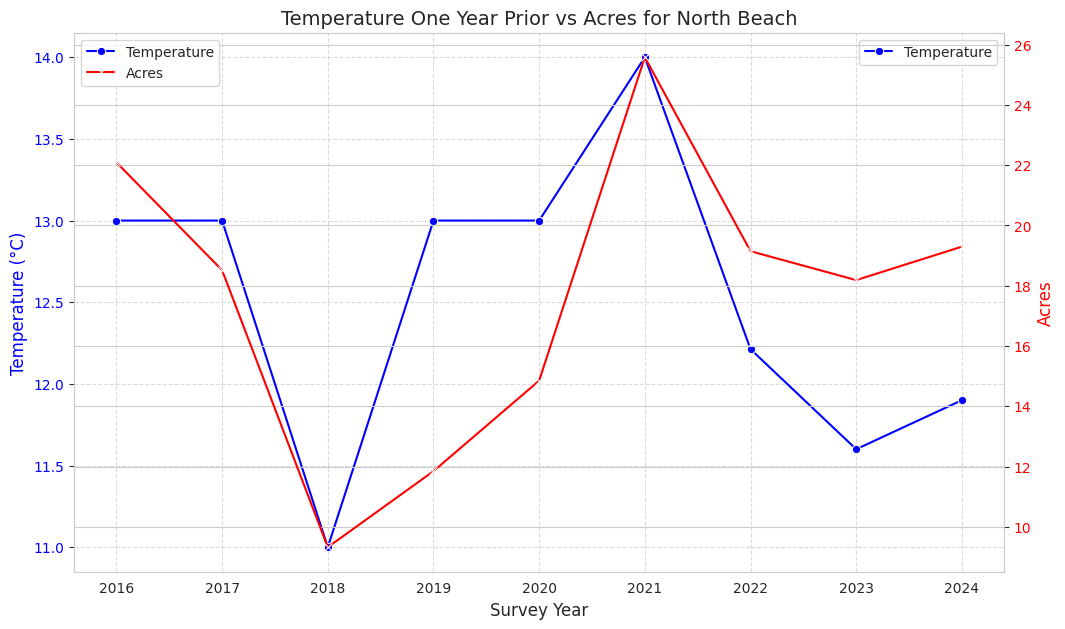

In [18]:
# Create a figure and a set of subplots
fig, ax1 = plt.subplots(figsize=(12, 7))

# Plot Temp_t on the first y-axis
sns.lineplot(data=north_clean, x='Survey Year', y='Temp_offset_minus1', marker='o', ax=ax1, color='blue', label='Temperature')
ax1.set_xlabel('Survey Year', fontsize=12)
ax1.set_ylabel('Temperature (°C)', color='blue', fontsize=12)
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid(True, linestyle='--', alpha=0.7)

# Create a second y-axis that shares the same x-axis
ax2 = ax1.twinx()

# Plot Acres on the second y-axis
sns.lineplot(data=north_clean, x='Survey Year', y='Acres', marker='x', ax=ax2, color='red', label='Acres')
ax2.set_ylabel('Acres', color='red', fontsize=12)
ax2.tick_params(axis='y', labelcolor='red')

# Add a title to the plot
plt.title('Temperature One Year Prior vs Acres for North Beach', fontsize=14)

# Add legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.show()

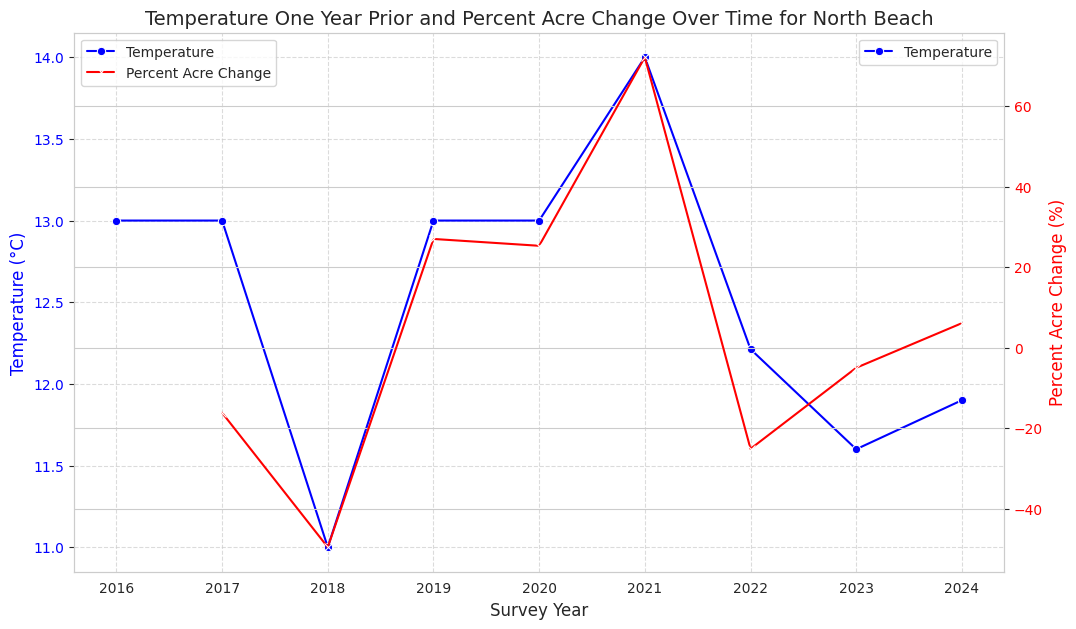

In [19]:
# Create a figure and a set of subplots
fig, ax1 = plt.subplots(figsize=(12, 7))

# Plot Temp_t on the first y-axis
sns.lineplot(data=north_clean, x='Survey Year', y='Temp_offset_minus1', marker='o', ax=ax1, color='blue', label='Temperature')
ax1.set_xlabel('Survey Year', fontsize=12)
ax1.set_ylabel('Temperature (°C)', color='blue', fontsize=12)
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid(True, linestyle='--', alpha=0.7)

# Create a second y-axis that shares the same x-axis
ax2 = ax1.twinx()

# Plot PctAcreChange on the second y-axis
sns.lineplot(data=north_clean, x='Survey Year', y='PctAcreChange', marker='x', ax=ax2, color='red', label='Percent Acre Change')
ax2.set_ylabel('Percent Acre Change (%)', color='red', fontsize=12)
ax2.tick_params(axis='y', labelcolor='red')

# Add a title to the plot
plt.title('Temperature One Year Prior and Percent Acre Change Over Time for North Beach', fontsize=14)

# Add legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.show()



## Shannon Point East

### Shannon Point East MLR

In [20]:
model_shannon_east_multiple  = smf.ols(formula='Acres ~ + Temp_t + Temp_offset_minus1 +Temp_offset_minus2 + Temp_offset_minus3 + Temp_offset_minus4', data=shannon_east_clean).fit()

print(model_shannon_east_multiple .summary())


                            OLS Regression Results                            
Dep. Variable:                  Acres   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.634
Method:                 Least Squares   F-statistic:                     3.430
Date:                Thu, 11 Dec 2025   Prob (F-statistic):              0.241
Time:                        23:23:15   Log-Likelihood:                -13.212
No. Observations:                   8   AIC:                             38.42
Df Residuals:                       2   BIC:                             38.90
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            -53.5267     20

### Shannon Point East SLR

In [21]:
model_shannon_east_single = smf.ols(formula='PctAcreChange ~ Temp_t', data=shannon_east_clean).fit()

print(model_shannon_east_single.summary())

                            OLS Regression Results                            
Dep. Variable:          PctAcreChange   R-squared:                       0.402
Model:                            OLS   Adj. R-squared:                  0.283
Method:                 Least Squares   F-statistic:                     3.363
Date:                Thu, 11 Dec 2025   Prob (F-statistic):              0.126
Time:                        23:23:15   Log-Likelihood:                -33.325
No. Observations:                   7   AIC:                             70.65
Df Residuals:                       5   BIC:                             70.54
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -184.4447     88.090     -2.094      0.0

/usr/local/lib/python3.12/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


### Shannon Point East Plots

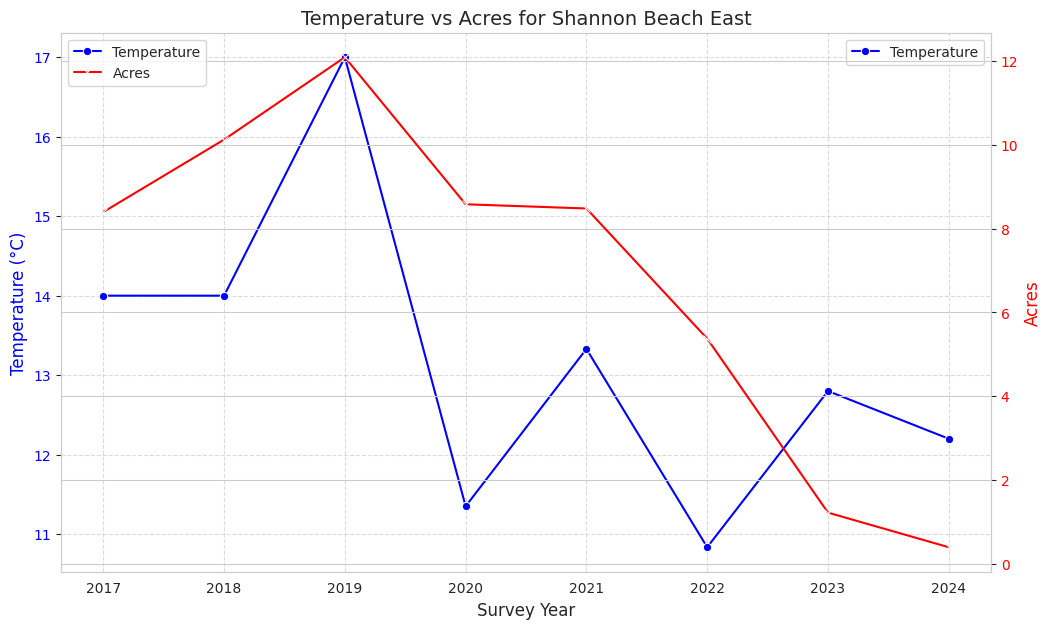

In [22]:
# Create a figure and a set of subplots
fig, ax1 = plt.subplots(figsize=(12, 7))

# Plot Temp_t on the first y-axis
sns.lineplot(data=shannon_east_clean, x='Survey Year', y='Temp_t', marker='o', ax=ax1, color='blue', label='Temperature')
ax1.set_xlabel('Survey Year', fontsize=12)
ax1.set_ylabel('Temperature (°C)', color='blue', fontsize=12)
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid(True, linestyle='--', alpha=0.7)

# Create a second y-axis that shares the same x-axis
ax2 = ax1.twinx()

# Plot Acres on the second y-axis
sns.lineplot(data=shannon_east_clean, x='Survey Year', y='Acres', marker='x', ax=ax2, color='red', label='Acres')
ax2.set_ylabel('Acres', color='red', fontsize=12)
ax2.tick_params(axis='y', labelcolor='red')

# Add a title to the plot
plt.title('Temperature vs Acres for Shannon Beach East', fontsize=14)

# Add legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.show()

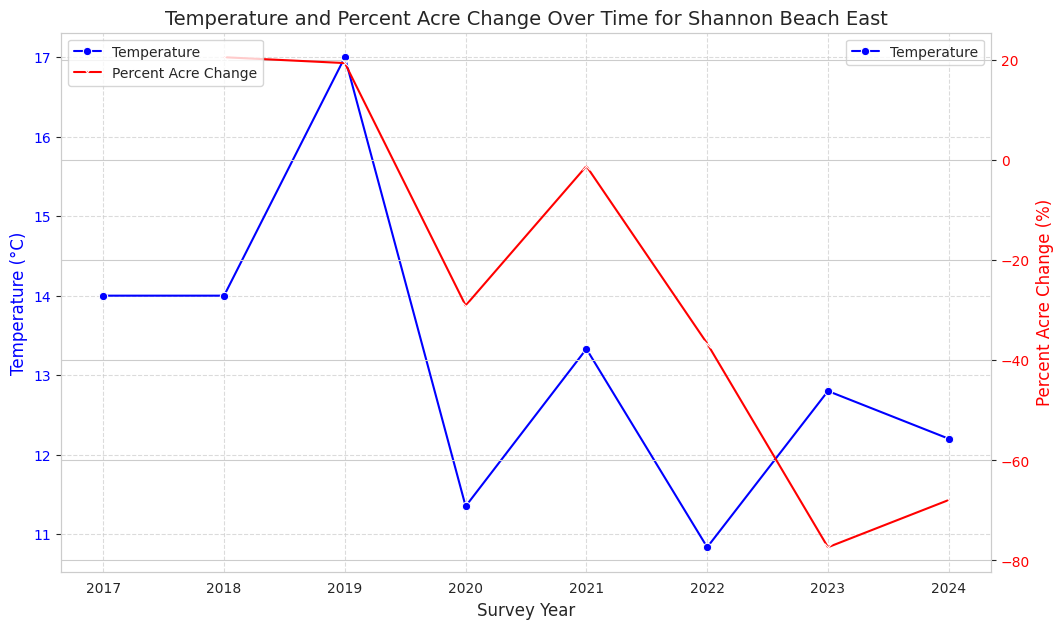

In [23]:
# Create a figure and a set of subplots
fig, ax1 = plt.subplots(figsize=(12, 7))

# Plot Temp_t on the first y-axis
sns.lineplot(data=shannon_east_clean, x='Survey Year', y='Temp_t', marker='o', ax=ax1, color='blue', label='Temperature')
ax1.set_xlabel('Survey Year', fontsize=12)
ax1.set_ylabel('Temperature (°C)', color='blue', fontsize=12)
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid(True, linestyle='--', alpha=0.7)

# Create a second y-axis that shares the same x-axis
ax2 = ax1.twinx()

# Plot PctAcreChange on the second y-axis
sns.lineplot(data=shannon_east_clean, x='Survey Year', y='PctAcreChange', marker='x', ax=ax2, color='red', label='Percent Acre Change')
ax2.set_ylabel('Percent Acre Change (%)', color='red', fontsize=12)
ax2.tick_params(axis='y', labelcolor='red')

# Add a title to the plot
plt.title('Temperature and Percent Acre Change Over Time for Shannon Beach East', fontsize=14)

# Add legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.show()

## Shannon Point West

### Shannon Point West MLR

In [24]:
model_shannon_west_multiple  = smf.ols(formula='Acres ~ + Temp_t + Temp_offset_minus1 +Temp_offset_minus2 + Temp_offset_minus3 + Temp_offset_minus4', data=shannon_east_clean).fit()

print(model_shannon_west_multiple.summary())

                            OLS Regression Results                            
Dep. Variable:                  Acres   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.634
Method:                 Least Squares   F-statistic:                     3.430
Date:                Thu, 11 Dec 2025   Prob (F-statistic):              0.241
Time:                        23:23:16   Log-Likelihood:                -13.212
No. Observations:                   8   AIC:                             38.42
Df Residuals:                       2   BIC:                             38.90
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            -53.5267     20

### Shannon Point SLR

In [25]:
model_shannon_west_single = smf.ols(formula='PctAcreChange ~ Temp_t_minus3', data=shannon_west_clean).fit()

print(model_shannon_west_single.summary())

                            OLS Regression Results                            
Dep. Variable:          PctAcreChange   R-squared:                       0.472
Model:                            OLS   Adj. R-squared:                  0.366
Method:                 Least Squares   F-statistic:                     4.463
Date:                Thu, 11 Dec 2025   Prob (F-statistic):             0.0883
Time:                        23:23:16   Log-Likelihood:                -35.704
No. Observations:                   7   AIC:                             75.41
Df Residuals:                       5   BIC:                             75.30
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       304.6862    137.408      2.217

/usr/local/lib/python3.12/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


### Plots SHPT W

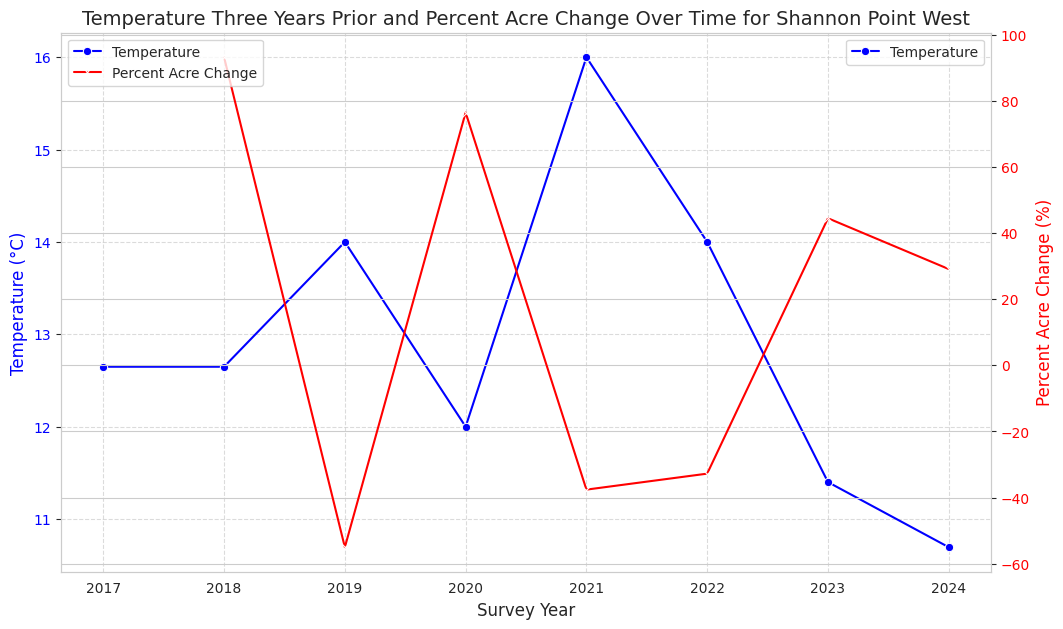

In [26]:
# Create a figure and a set of subplots
fig, ax1 = plt.subplots(figsize=(12, 7))

# Plot Temp_t on the first y-axis
sns.lineplot(data=shannon_west_clean, x='Survey Year', y='Temp_t_minus3', marker='o', ax=ax1, color='blue', label='Temperature')
ax1.set_xlabel('Survey Year', fontsize=12)
ax1.set_ylabel('Temperature (°C)', color='blue', fontsize=12)
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid(True, linestyle='--', alpha=0.7)

# Create a second y-axis that shares the same x-axis
ax2 = ax1.twinx()

# Plot PctAcreChange on the second y-axis
sns.lineplot(data=shannon_west_clean, x='Survey Year', y='PctAcreChange', marker='x', ax=ax2, color='red', label='Percent Acre Change')
ax2.set_ylabel('Percent Acre Change (%)', color='red', fontsize=12)
ax2.tick_params(axis='y', labelcolor='red')

# Add a title to the plot
plt.title('Temperature Three Years Prior and Percent Acre Change Over Time for Shannon Point West', fontsize=14)

# Add legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.show()



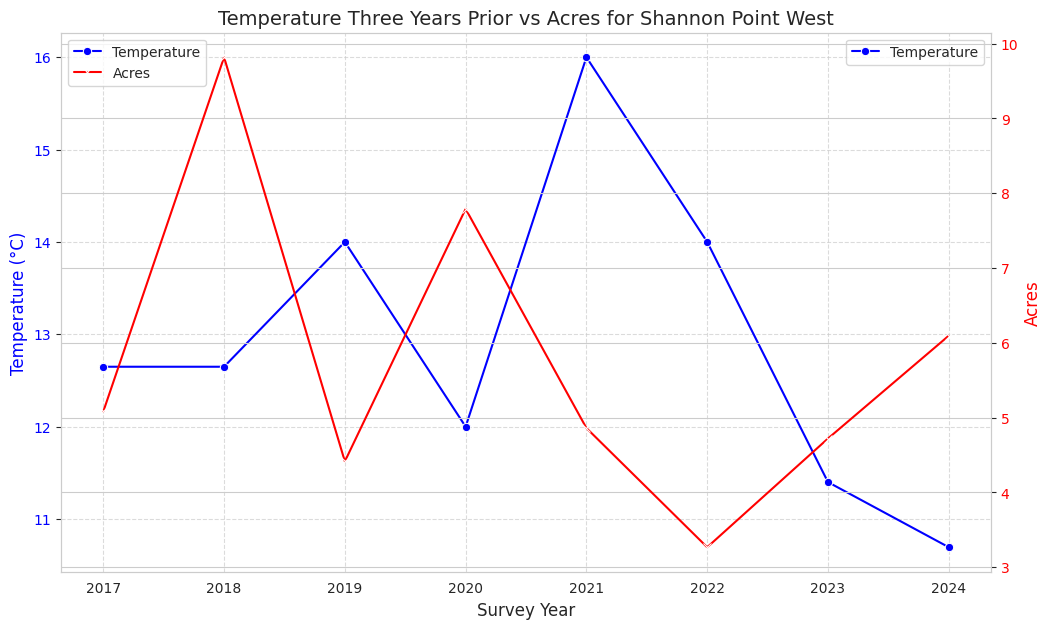

In [27]:
# Create a figure and a set of subplots
fig, ax1 = plt.subplots(figsize=(12, 7))

# Plot Temp_t on the first y-axis
sns.lineplot(data=shannon_west_clean, x='Survey Year', y='Temp_t_minus3', marker='o', ax=ax1, color='blue', label='Temperature')
ax1.set_xlabel('Survey Year', fontsize=12)
ax1.set_ylabel('Temperature (°C)', color='blue', fontsize=12)
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid(True, linestyle='--', alpha=0.7)

# Create a second y-axis that shares the same x-axis
ax2 = ax1.twinx()

# Plot Acres on the second y-axis
sns.lineplot(data=shannon_west_clean, x='Survey Year', y='Acres', marker='x', ax=ax2, color='red', label='Acres')
ax2.set_ylabel('Acres', color='red', fontsize=12)
ax2.tick_params(axis='y', labelcolor='red')

# Add a title to the plot
plt.title('Temperature Three Years Prior vs Acres for Shannon Point West', fontsize=14)

# Add legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.show()

## Comparisons

### MLR table

In [28]:
def extract_model_metrics(model, bed_name):
    """
    Extracts key metrics from an OLS regression model summary.
    """
    metrics = {
        "Bed Name": bed_name,
        "R-squared": None,
        "Best Predictor": None,
        "Coefficient": None,
        "P-value": None,
        "Notes": ""
    }

    if model.rsquared is None or np.isnan(model.rsquared):
        metrics["R-squared"] = "N/A"
        metrics["Notes"] = "Model unreliable due to insufficient data or singularity."
        return metrics

    metrics["R-squared"] = round(model.rsquared, 3)

    # Exclude intercept from predictors
    predictor_pvalues = model.pvalues.drop("Intercept", errors='ignore')
    predictor_coefficients = model.params.drop("Intercept", errors='ignore')

    if not predictor_pvalues.empty:
        # Filter out NaN p-values which might indicate issues
        valid_pvalues = predictor_pvalues.dropna()
        if not valid_pvalues.empty:
            min_p_value = valid_pvalues.min()
            best_predictor = valid_pvalues.idxmin()

            # Ensure the best_predictor's coefficient is not inf or nan
            best_coef = predictor_coefficients.get(best_predictor)
            if best_coef is not None and not np.isinf(best_coef) and not np.isnan(best_coef):
                metrics["Best Predictor"] = best_predictor
                metrics["Coefficient"] = round(best_coef, 3)
                metrics["P-value"] = round(min_p_value, 3)
                if min_p_value > 0.05:
                    metrics["Notes"] = "No statistically significant predictor at p<0.05."
            else:
                metrics["Notes"] = "Best predictor's coefficient was invalid (NaN/Inf)."
        else:
            metrics["Notes"] = "No valid p-values for predictors."
    else:
        metrics["Notes"] = "No predictors found (only intercept or no data)."

    # Check for general model issues
    if "Cond. No." in str(model.summary2()) and "e+0" in str(model.summary2()):
         if "multicollinearity" not in metrics["Notes"]:
            metrics["Notes"] = (metrics["Notes"] + " High multicollinearity suspected." if metrics["Notes"] else "High multicollinearity suspected.")

    return metrics

# List of models and their corresponding bed names
models_to_analyze = [
    (model_shannon_east_multiple, "Shannon Point East"),
    (model_shannon_west_multiple, "Shannon Point West"),
    (model_north_multiple, "North Beach"),
    (model_ebey_multiple_acres, "Ebey's Landing"),
    (model_all_multiple, "All Beds")
]

results = []
for model, bed_name in models_to_analyze:
    results.append(extract_model_metrics(model, bed_name))

# Convert results to DataFrame
summary_df = pd.DataFrame(results)

In [29]:
display(summary_df)

,Bed Name,R-squared,Best Predictor,Coefficient,P-value,Notes
0,Shannon Point East,0.896,Temp_t,1.341,0.140,No statistically significant predictor at p<0.05.
1,Shannon Point West,0.896,Temp_t,1.341,0.140,No statistically significant predictor at p<0.05.
2,North Beach,0.815,Temp_offset_minus1,5.799,0.048,
3,Ebey's Landing,0.185,Temp_offset_minus2,-13.006,0.476,No statistically significant predictor at p<0.05.
4,All Beds,0.064,Temp_t_minus2,7.137,0.044,


### SLR Table

In [32]:
import pandas as pd
import numpy as np

def extract_model_metrics(model, bed_name):
    """
    Extracts key metrics from an OLS regression model summary.
    """
    metrics = {
        "Bed Name": bed_name,
        "R-squared": None,
        "Best Predictor": None,
        "Coefficient": None,
        "P-value": None,
        "Notes": ""
    }

    if model.rsquared is None or np.isnan(model.rsquared):
        metrics["R-squared"] = "N/A"
        metrics["Notes"] = "Model unreliable due to insufficient data or singularity."
        return metrics

    metrics["R-squared"] = round(model.rsquared, 3)

    # Exclude intercept from predictors
    predictor_pvalues = model.pvalues.drop("Intercept", errors='ignore')
    predictor_coefficients = model.params.drop("Intercept", errors='ignore')

    if not predictor_pvalues.empty:
        # Filter out NaN p-values which might indicate issues
        valid_pvalues = predictor_pvalues.dropna()
        if not valid_pvalues.empty:
            min_p_value = valid_pvalues.min()
            best_predictor = valid_pvalues.idxmin()

            # Ensure the best_predictor's coefficient is not inf or nan
            best_coef = predictor_coefficients.get(best_predictor)
            if best_coef is not None and not np.isinf(best_coef) and not np.isnan(best_coef):
                metrics["Best Predictor"] = best_predictor
                metrics["Coefficient"] = round(best_coef, 3)
                metrics["P-value"] = round(min_p_value, 3)
                if min_p_value > 0.05:
                    metrics["Notes"] = "No statistically significant predictor at p<0.05."
            else:
                metrics["Notes"] = "Best predictor's coefficient was invalid (NaN/Inf)."
        else:
            metrics["Notes"] = "No valid p-values for predictors."
    else:
        metrics["Notes"] = "No predictors found (only intercept or no data)."

    # Check for general model issues
    if "Cond. No." in str(model.summary2()) and "e+0" in str(model.summary2()):
         if "multicollinearity" not in metrics["Notes"]:
            metrics["Notes"] = (metrics["Notes"] + " High multicollinearity suspected." if metrics["Notes"] else "High multicollinearity suspected.")

    return metrics

# List of models and their corresponding bed names
models_to_analyze = [
    (model_shannon_east_single, "Shannon Point East"),
    (model_shannon_west_single, "Shannon Point West"),
    (model_north_single, "North Beach"),
    (model_ebey_single_acres, "Ebey's Landing"),
    (model_all_single_acres, "All Beds")
]

results = []
for model, bed_name in models_to_analyze:
    results.append(extract_model_metrics(model, bed_name))

# Convert results to DataFrame
summary_df_single = pd.DataFrame(results)

/usr/local/lib/python3.12/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/usr/local/lib/python3.12/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [33]:
display(summary_df_single)

,Bed Name,R-squared,Best Predictor,Coefficient,P-value,Notes
0,Shannon Point East,0.402,Temp_t,12.228,0.126,No statistically significant predictor at p<0.05.
1,Shannon Point West,0.472,Temp_t_minus3,-22.205,0.088,No statistically significant predictor at p<0.05.
2,North Beach,0.690,Temp_offset_minus1,32.370,0.011,
3,Ebey's Landing,0.095,Temp_offset_minus2,-5.050,0.386,No statistically significant predictor at p<0.05.
4,All Beds,0.002,Temp_t_minus2,0.723,0.643,No statistically significant predictor at p<0.05.


### Acres

In [34]:
def extract_model_metrics(model, bed_name):
    """
    Extracts key metrics from an OLS regression model summary.
    """
    metrics = {
        "Bed Name": bed_name,
        "R-squared": None,
        "Best Predictor": None,
        "Coefficient": None,
        "P-value": None,
        "Notes": ""
    }

    if model.rsquared is None or np.isnan(model.rsquared):
        metrics["R-squared"] = "N/A"
        metrics["Notes"] = "Model unreliable due to insufficient data or singularity."
        return metrics

    metrics["R-squared"] = round(model.rsquared, 3)

    # Exclude intercept from predictors
    predictor_pvalues = model.pvalues.drop("Intercept", errors='ignore')
    predictor_coefficients = model.params.drop("Intercept", errors='ignore')

    if not predictor_pvalues.empty:
        # Filter out NaN p-values which might indicate issues
        valid_pvalues = predictor_pvalues.dropna()
        if not valid_pvalues.empty:
            min_p_value = valid_pvalues.min()
            best_predictor = valid_pvalues.idxmin()

            # Ensure the best_predictor's coefficient is not inf or nan
            best_coef = predictor_coefficients.get(best_predictor)
            if best_coef is not None and not np.isinf(best_coef) and not np.isnan(best_coef):
                metrics["Best Predictor"] = best_predictor
                metrics["Coefficient"] = round(best_coef, 3)
                metrics["P-value"] = round(min_p_value, 3)
                if min_p_value > 0.05:
                    metrics["Notes"] = "No statistically significant predictor at p<0.05."
            else:
                metrics["Notes"] = "Best predictor's coefficient was invalid (NaN/Inf)."
        else:
            metrics["Notes"] = "No valid p-values for predictors."
    else:
        metrics["Notes"] = "No predictors found (only intercept or no data)."

    # Check for general model issues
    if "Cond. No." in str(model.summary2()) and "e+0" in str(model.summary2()):
         if "multicollinearity" not in metrics["Notes"]:
            metrics["Notes"] = (metrics["Notes"] + " High multicollinearity suspected." if metrics["Notes"] else "High multicollinearity suspected.")

    return metrics

# List of models and their corresponding bed names
models_to_analyze = [
    (model_shannon_east_multiple, "Shannon Point East"),
    (model_shannon_west_multiple, "Shannon Point West"),
    (model_north_multiple, "North Beach"),
    (model_ebey_multiple_acres, "Ebey's Landing"),
    (model_all_multiple, "All Beds")
]

results = []
for model, bed_name in models_to_analyze:
    results.append(extract_model_metrics(model, bed_name))

# Convert results to DataFrame
summary_df_acres = pd.DataFrame(results)

display(summary_df_acres)



,Bed Name,R-squared,Best Predictor,Coefficient,P-value,Notes
0,Shannon Point East,0.896,Temp_t,1.341,0.140,No statistically significant predictor at p<0.05.
1,Shannon Point West,0.896,Temp_t,1.341,0.140,No statistically significant predictor at p<0.05.
2,North Beach,0.815,Temp_offset_minus1,5.799,0.048,
3,Ebey's Landing,0.185,Temp_offset_minus2,-13.006,0.476,No statistically significant predictor at p<0.05.
4,All Beds,0.064,Temp_t_minus2,7.137,0.044,


### Single

In [36]:
def extract_model_metrics(model, bed_name):
    """
    Extracts key metrics from an OLS regression model summary.
    """
    metrics = {
        "Bed Name": bed_name,
        "R-squared": None,
        "Best Predictor": None,
        "Coefficient": None,
        "P-value": None,
        "Notes": ""
    }

    if model.rsquared is None or np.isnan(model.rsquared):
        metrics["R-squared"] = "N/A"
        metrics["Notes"] = "Model unreliable due to insufficient data or singularity."
        return metrics

    metrics["R-squared"] = round(model.rsquared, 3)

    # Exclude intercept from predictors
    predictor_pvalues = model.pvalues.drop("Intercept", errors='ignore')
    predictor_coefficients = model.params.drop("Intercept", errors='ignore')

    if not predictor_pvalues.empty:
        # Filter out NaN p-values which might indicate issues
        valid_pvalues = predictor_pvalues.dropna()
        if not valid_pvalues.empty:
            min_p_value = valid_pvalues.min()
            best_predictor = valid_pvalues.idxmin()

            # Ensure the best_predictor's coefficient is not inf or nan
            best_coef = predictor_coefficients.get(best_predictor)
            if best_coef is not None and not np.isinf(best_coef) and not np.isnan(best_coef):
                metrics["Best Predictor"] = best_predictor
                metrics["Coefficient"] = round(best_coef, 3)
                metrics["P-value"] = round(min_p_value, 3)
                if min_p_value > 0.05:
                    metrics["Notes"] = "No statistically significant predictor at p<0.05."
            else:
                metrics["Notes"] = "Best predictor's coefficient was invalid (NaN/Inf)."
        else:
            metrics["Notes"] = "No valid p-values for predictors."
    else:
        metrics["Notes"] = "No predictors found (only intercept or no data)."

    # Check for general model issues
    if "Cond. No." in str(model.summary2()) and "e+0" in str(model.summary2()):
         if "multicollinearity" not in metrics["Notes"]:
            metrics["Notes"] = (metrics["Notes"] + " High multicollinearity suspected." if metrics["Notes"] else "High multicollinearity suspected.")

    return metrics

# List of models and their corresponding bed names
models_to_analyze = [
    (model_shannon_east_single, "Shannon Point East"),
    (model_shannon_west_single, "Shannon Point West"),
    (model_north_single, "North Beach"),
    (model_ebey_single_acres, "Ebey's Landing"),
    (model_all_single_acres, "All Beds")
]

results = []
for model, bed_name in models_to_analyze:
    results.append(extract_model_metrics(model, bed_name))

# Convert results to DataFrame
summary_df_single_acres = pd.DataFrame(results)

display(summary_df_single_acres)



/usr/local/lib/python3.12/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/usr/local/lib/python3.12/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


,Bed Name,R-squared,Best Predictor,Coefficient,P-value,Notes
0,Shannon Point East,0.402,Temp_t,12.228,0.126,No statistically significant predictor at p<0.05.
1,Shannon Point West,0.472,Temp_t_minus3,-22.205,0.088,No statistically significant predictor at p<0.05.
2,North Beach,0.690,Temp_offset_minus1,32.370,0.011,
3,Ebey's Landing,0.095,Temp_offset_minus2,-5.050,0.386,No statistically significant predictor at p<0.05.
4,All Beds,0.002,Temp_t_minus2,0.723,0.643,No statistically significant predictor at p<0.05.


## Side by side

### Shannon Beach east and west side by side line plot code:

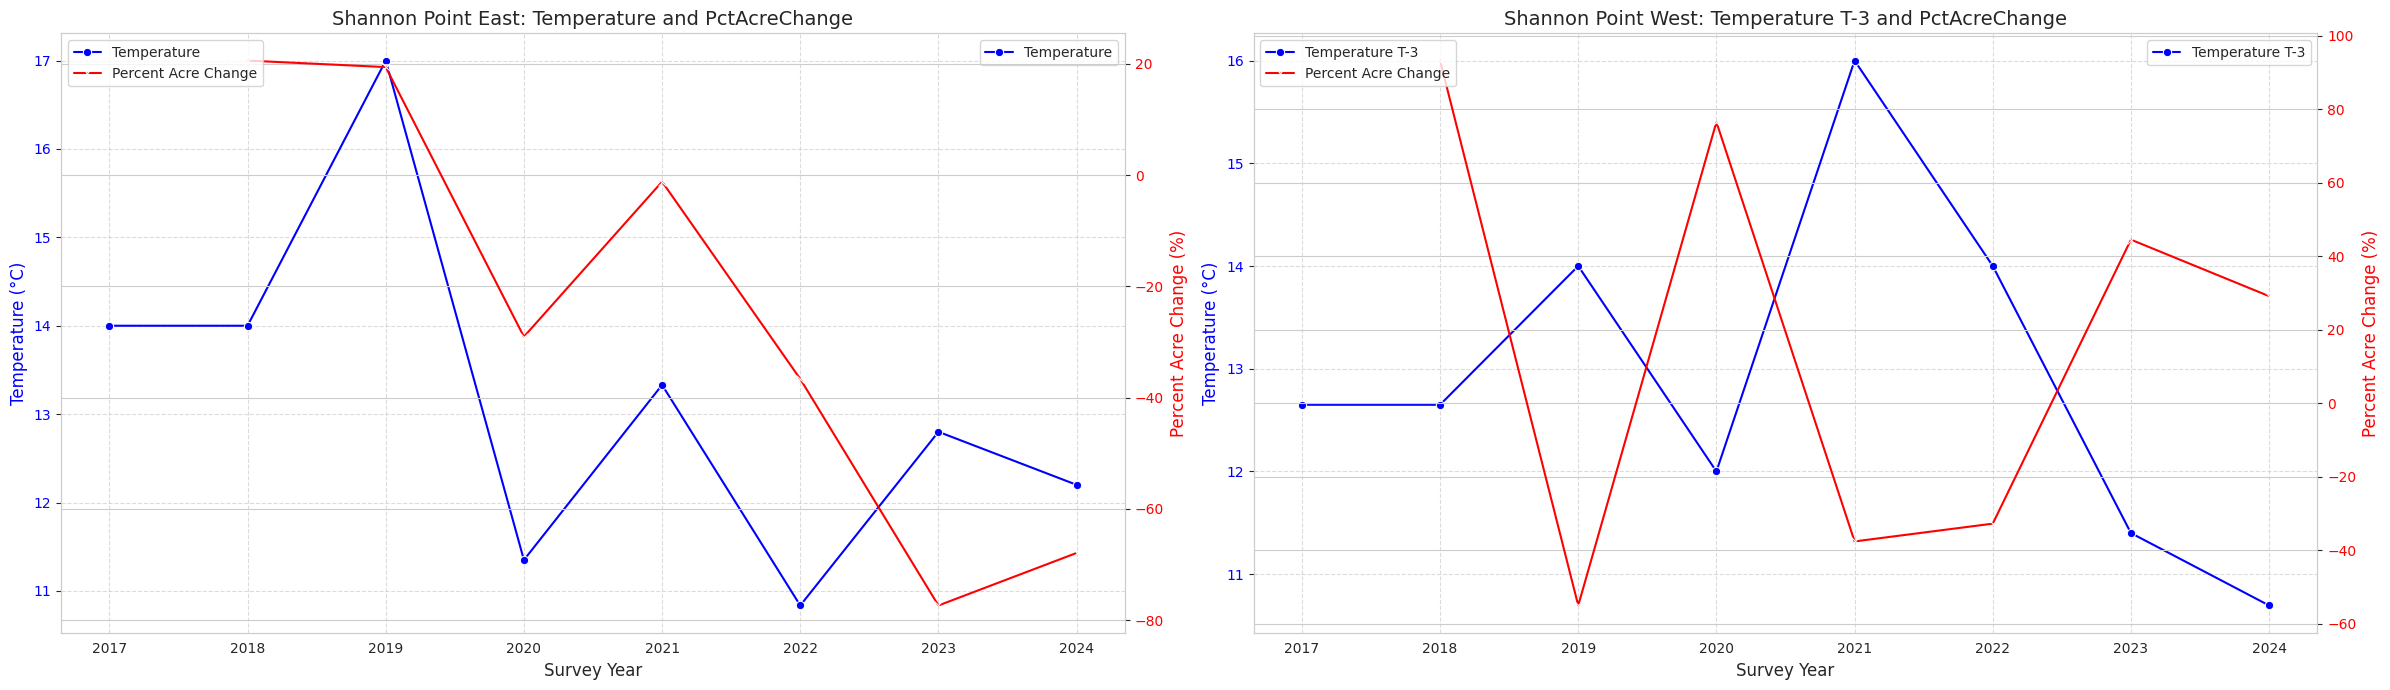

In [37]:
selected_cols = [
    "Site Code", "Survey Day", "Survey Month", "Survey Year",
    "Acres", 'Temp_t', 'Temp_offset_minus1', 'Temp_offset_minus2',
       'Temp_offset_minus3', 'Temp_offset_minus4', "PctAcreChange"
]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 7)) # 1 row, 2 columns

# --- Plot for Shannon Point East (Left Subplot) ---
# Plot Temp_t on the first y-axis for Shannon East
sns.lineplot(data=shannon_east_clean, x='Survey Year', y='Temp_t', marker='o', ax=ax1, color='blue', label='Temperature')
ax1.set_xlabel('Survey Year', fontsize=12)
ax1.set_ylabel('Temperature (°C)', color='blue', fontsize=12)
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid(True, linestyle='--', alpha=0.7)

# Create a second y-axis for Shannon East
ax1_twin = ax1.twinx()
sns.lineplot(data=shannon_east_clean, x='Survey Year', y='PctAcreChange', marker='x', ax=ax1_twin, color='red', label='Percent Acre Change')
ax1_twin.set_ylabel('Percent Acre Change (%)', color='red', fontsize=12)
ax1_twin.tick_params(axis='y', labelcolor='red')

# Add title and combined legend for Shannon East
ax1.set_title('Shannon Point East: Temperature and PctAcreChange', fontsize=14)
lines1, labels1 = ax1.get_legend_handles_labels()
lines1_twin, labels1_twin = ax1_twin.get_legend_handles_labels()
ax1_twin.legend(lines1 + lines1_twin, labels1 + labels1_twin, loc='upper left')

# --- Plot for Shannon Point West (Right Subplot) ---
# Plot Temp_t on the first y-axis for Shannon West
sns.lineplot(data=shannon_west_clean, x='Survey Year', y='Temp_t_minus3', marker='o', ax=ax2, color='blue', label='Temperature T-3')
ax2.set_xlabel('Survey Year', fontsize=12)
ax2.set_ylabel('Temperature (°C)', color='blue', fontsize=12)
ax2.tick_params(axis='y', labelcolor='blue')
ax2.grid(True, linestyle='--', alpha=0.7)

# Create a second y-axis for Shannon West
ax2_twin = ax2.twinx()
sns.lineplot(data=shannon_west_clean, x='Survey Year', y='PctAcreChange', marker='x', ax=ax2_twin, color='red', label='Percent Acre Change')
ax2_twin.set_ylabel('Percent Acre Change (%)', color='red', fontsize=12)
ax2_twin.tick_params(axis='y', labelcolor='red')

# Add title and combined legend for Shannon West
ax2.set_title('Shannon Point West: Temperature T-3 and PctAcreChange', fontsize=14)
lines2, labels2 = ax2.get_legend_handles_labels()
lines2_twin, labels2_twin = ax2_twin.get_legend_handles_labels()
ax2_twin.legend(lines2 + lines2_twin, labels2 + labels2_twin, loc='upper left')

plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.show()

### Ebey and North Beach

In [38]:
ebey_clean.columns

Index(['Bed Name', 'Site Code', 'Survey Day', 'Survey Month', 'Survey Year',
       'Acres', 'Temp_t', 'Temp_offset_minus1', 'Temp_offset_minus2',
       'Temp_offset_minus3', 'Temp_offset_minus4', 'PctAcreChange'],
      dtype='object')

In [39]:
north_beach_east_clean.columns

Index(['Bed Name', 'Site Code', 'Survey Day', 'Survey Month', 'Survey Year',
       'Acres', 'Temp_t', 'Temp_offset_minus1', 'Temp_offset_minus2',
       'Temp_offset_minus3', 'Temp_offset_minus4', 'PctAcreChange'],
      dtype='object')

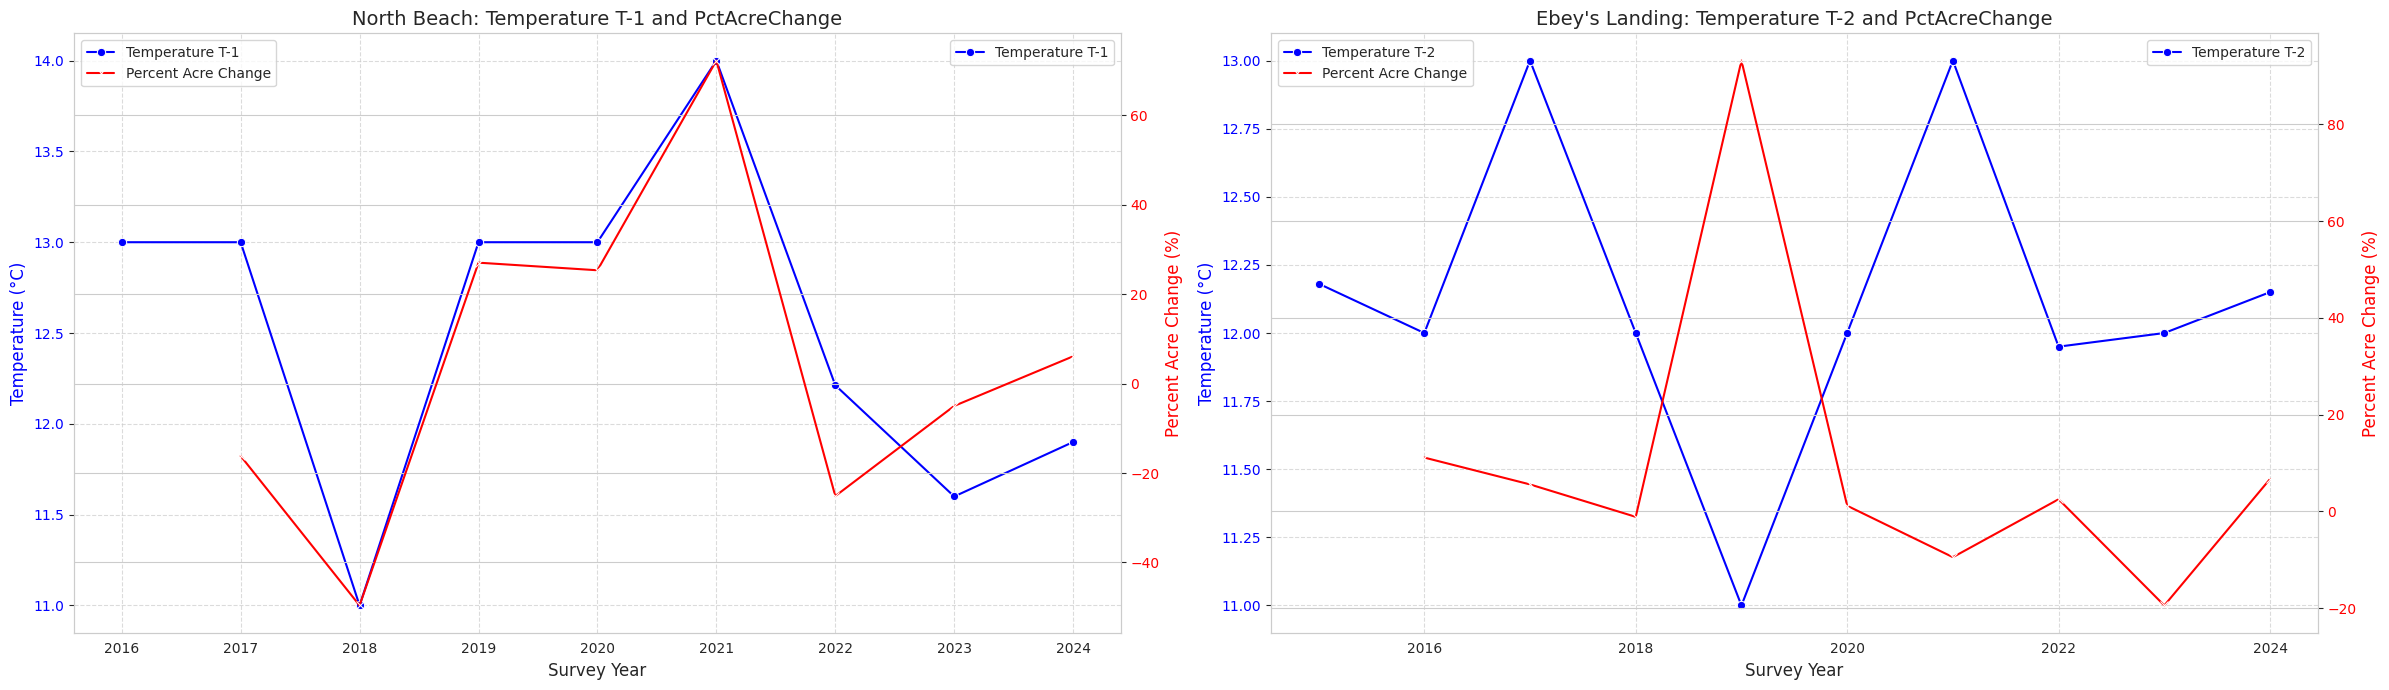

In [40]:
# Define selected columns for consistency
selected_cols = [
    "Site Code", "Survey Day", "Survey Month", "Survey Year",
    "Acres", 'Temp_t', 'Temp_offset_minus1', 'Temp_offset_minus2',
       'Temp_offset_minus3', 'Temp_offset_minus4', "PctAcreChange"
]


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 7)) # 1 row, 2 columns

# --- Plot for North Beach (Left Subplot) ---
# Plot Temp_t_minus1 on the first y-axis for North Beach
sns.lineplot(data=north_clean, x='Survey Year', y='Temp_offset_minus1', marker='o', ax=ax1, color='blue', label='Temperature T-1')
ax1.set_xlabel('Survey Year', fontsize=12)
ax1.set_ylabel('Temperature (°C)', color='blue', fontsize=12)
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid(True, linestyle='--', alpha=0.7)

# Create a second y-axis for North Beach
ax1_twin = ax1.twinx()
sns.lineplot(data=north_clean, x='Survey Year', y='PctAcreChange', marker='x', ax=ax1_twin, color='red', label='Percent Acre Change')
ax1_twin.set_ylabel('Percent Acre Change (%)', color='red', fontsize=12)
ax1_twin.tick_params(axis='y', labelcolor='red')

# Add title and combined legend for North Beach
ax1.set_title('North Beach: Temperature T-1 and PctAcreChange', fontsize=14)
lines1, labels1 = ax1.get_legend_handles_labels()
lines1_twin, labels1_twin = ax1_twin.get_legend_handles_labels()
ax1_twin.legend(lines1 + lines1_twin, labels1 + labels1_twin, loc='upper left')

# --- Plot for Ebey's Landing (Right Subplot) ---
# Plot Temp_t_minus2 on the first y-axis for Ebey's Landing
sns.lineplot(data=ebey_clean, x='Survey Year', y='Temp_offset_minus2', marker='o', ax=ax2, color='blue', label='Temperature T-2')
ax2.set_xlabel('Survey Year', fontsize=12)
ax2.set_ylabel('Temperature (°C)', color='blue', fontsize=12)
ax2.tick_params(axis='y', labelcolor='blue')
ax2.grid(True, linestyle='--', alpha=0.7)

# Create a second y-axis for Ebey's Landing
ax2_twin = ax2.twinx()
sns.lineplot(data=ebey_clean, x='Survey Year', y='PctAcreChange', marker='x', ax=ax2_twin, color='red', label='Percent Acre Change')
ax2_twin.set_ylabel('Percent Acre Change (%)', color='red', fontsize=12)
ax2_twin.tick_params(axis='y', labelcolor='red')

# Add title and combined legend for Ebey's Landing
ax2.set_title('Ebey\'s Landing: Temperature T-2 and PctAcreChange', fontsize=14)
lines2, labels2 = ax2.get_legend_handles_labels()
lines2_twin, labels2_twin = ax2_twin.get_legend_handles_labels()
ax2_twin.legend(lines2 + lines2_twin, labels2 + labels2_twin, loc='upper left')

plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.show()